# Setting up Libraries

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [34]:
data = pd.read_csv('Allinone.csv')

In [35]:
data.columns

Index(['Timestamp', 'Do you own a mobile phone?',
       'Do you use your mobile phone for any financial/ banking transactions?',
       'Do you operate a bank account?',
       'What type of bank account do you operate?',
       'Who provides your mobile banking service?',
       'Is your mobile banking service an addition to existing bank account or separate service?',
       'What type of Mobile Money transaction do you frequently make use? (Select all that applies)',
       'How often do you make perform transactions based on the above [Airtime recharge]',
       'How often do you make perform transactions based on the above [Fund transfer]',
       'How often do you make perform transactions based on the above [Balance inquiry / Bank statement]',
       'How often do you make perform transactions based on the above [Bill payment]',
       'How often do you make perform transactions based on the above [International Remittance]',
       'How often do you make perform transactions b

In [36]:
data = data.drop(['Unnamed: 58', 'Unnamed: 59', 'Unnamed: 60', 'Unnamed: 61', 'Unnamed: 62'], axis=1)

# Manually renaming columns

In [37]:
newcols = ['Timestamp', 
                'PhoneUser', 
                'MobileBanking', 
                'BankAccount',
                'AccountType',
                'ServiceProvider',
                'PlusBankaccount',
                'TransactionActivity',
                'Airtime',
                'FundTransfer',
                'Inquiries',
                'BillPayment',
                'IntlRemittance',
                'Savings',
                'Withdrawals',
                'Purchasing',
                'Investments',
                'PensionFund',
                'TransferFunnel',
                'SendRecieve',
                'Transfer_Family',
                'Transfer_Friends',
                'Employer_Employee',
                'Transfer_Government',
                'BillPayments',
                'BillpaymentType',
                'Accessibility',
                'BankKnowledge',
                'MBSKnowledge',
                'MobileUsability',
                'ATMUsability',
                'InternetUsability',
                'POSUsability',
                'DebitcardUsability',
                'PrepaidcardUsability',
                'Navigation',
                'Understandable',
                'Payment',
                'Transfer_Ease',
                'InquiryEase',
                'BST_Overall',
                'BST_banks',
                'BST_technology',
                'BST_thirdparty',
                'Security',
                'Usage',
                'Cost',
                'Time',
                'Access',
                'Physical_security',
                'Specifics',
                'LTC_Importance',
                'SFF_Importance',
                'PS_Importance',
                'Feedback_Importance',
                'Range_Importance',
                'TA__Importance',
                'Specific_Importance']

In [38]:
# creating a schema for the survey questions
oldcols = data.columns

survey_schema = pd.DataFrame({"Column": newcols, 
                              "Question": oldcols})

survey_schema.to_csv('survey_schema.csv', index=False)

In [39]:
survey_df = pd.read_csv('survey_schema.csv')
survey_df.tail()

,Column,Question
53,PS_Importance,Please rate how important the following reason...
54,Feedback_Importance,Please rate how important the following reason...
55,Range_Importance,Please rate how important the following reason...
56,TA__Importance,Please rate how important the following reason...
57,Specific_Importance,Please rate how important the following reason...


In [40]:
# Assigning new column titles to original survey csv
data.columns = newcols

# Cleaning the Data

In [41]:
data = data.drop('Timestamp', axis=1)

<AxesSubplot:>

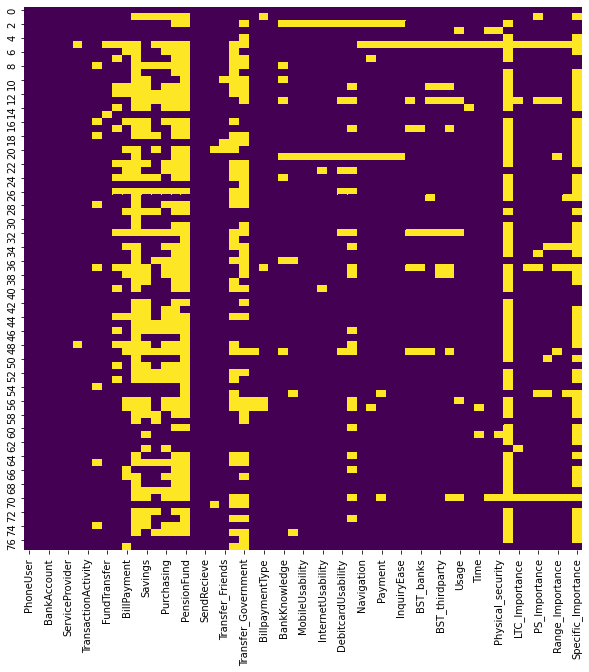

In [42]:
# Visualizing the distribution of missing values
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.isnull(),cbar=False,cmap='viridis')

In [43]:
# output percentage of values that are missing
data.isnull().sum()

PhoneUser                0
MobileBanking            0
BankAccount              0
AccountType              0
ServiceProvider          0
PlusBankaccount          2
TransactionActivity      0
Airtime                  8
FundTransfer             2
Inquiries               17
BillPayment             23
IntlRemittance          59
Savings                 39
Withdrawals             23
Purchasing              36
Investments             55
PensionFund             61
TransferFunnel           0
SendRecieve              0
Transfer_Family          2
Transfer_Friends         3
Employer_Employee       39
Transfer_Government     43
BillPayments             3
BillpaymentType          4
Accessibility            0
BankKnowledge            8
MBSKnowledge             5
MobileUsability          2
ATMUsability             2
InternetUsability        4
POSUsability             2
DebitcardUsability       7
PrepaidcardUsability    21
Navigation               3
Understandable           5
Payment                  5
T

In [44]:
# numerical data
floats = data.select_dtypes(include='float64')

# categorical data
objects = data.select_dtypes(include='object')

In [45]:
# Dealing with missing values from the numerical data
floats = floats.transform(lambda x: x.fillna(x.mean().round()))
floats.isnull().sum()

BankKnowledge           0
MBSKnowledge            0
MobileUsability         0
ATMUsability            0
InternetUsability       0
POSUsability            0
DebitcardUsability      0
PrepaidcardUsability    0
Navigation              0
Understandable          0
Payment                 0
Transfer_Ease           0
InquiryEase             0
BST_Overall             0
BST_banks               0
BST_technology          0
BST_thirdparty          0
Security                0
Usage                   0
Cost                    0
Time                    0
Access                  0
Physical_security       0
Specifics               0
LTC_Importance          0
SFF_Importance          0
PS_Importance           0
Feedback_Importance     0
Range_Importance        0
TA__Importance          0
Specific_Importance     0
dtype: int64

In [46]:
# Dealing with the categorical data
objects = objects.fillna(method='ffill').fillna(method='bfill')
objects.isnull().sum()

PhoneUser              0
MobileBanking          0
BankAccount            0
AccountType            0
ServiceProvider        0
PlusBankaccount        0
TransactionActivity    0
Airtime                0
FundTransfer           0
Inquiries              0
BillPayment            0
IntlRemittance         0
Savings                0
Withdrawals            0
Purchasing             0
Investments            0
PensionFund            0
TransferFunnel         0
SendRecieve            0
Transfer_Family        0
Transfer_Friends       0
Employer_Employee      0
Transfer_Government    0
BillPayments           0
BillpaymentType        0
Accessibility          0
dtype: int64

In [47]:
# Combining Data
df = pd.concat([objects, floats])

# Visualization and total count of variable entries

The flollowing cells will be used to show the total number of responses for every variable in the multichoice questions. the multichoice questions have distinct columns in the dataframe. For every column, there will be two cells; one of which shows the total counts and the other which will be used to plots the counts, if they vary.

In [48]:
df.columns

Index(['PhoneUser', 'MobileBanking', 'BankAccount', 'AccountType',
       'ServiceProvider', 'PlusBankaccount', 'TransactionActivity', 'Airtime',
       'FundTransfer', 'Inquiries', 'BillPayment', 'IntlRemittance', 'Savings',
       'Withdrawals', 'Purchasing', 'Investments', 'PensionFund',
       'TransferFunnel', 'SendRecieve', 'Transfer_Family', 'Transfer_Friends',
       'Employer_Employee', 'Transfer_Government', 'BillPayments',
       'BillpaymentType', 'Accessibility', 'BankKnowledge', 'MBSKnowledge',
       'MobileUsability', 'ATMUsability', 'InternetUsability', 'POSUsability',
       'DebitcardUsability', 'PrepaidcardUsability', 'Navigation',
       'Understandable', 'Payment', 'Transfer_Ease', 'InquiryEase',
       'BST_Overall', 'BST_banks', 'BST_technology', 'BST_thirdparty',
       'Security', 'Usage', 'Cost', 'Time', 'Access', 'Physical_security',
       'Specifics', 'LTC_Importance', 'SFF_Importance', 'PS_Importance',
       'Feedback_Importance', 'Range_Importance', 'TA

In [49]:
df.PhoneUser.value_counts().sort_values()
# the phoneuser column has no varying entries and will therefore not be visualized

Yes    78
Name: PhoneUser, dtype: int64

In [50]:
df.MobileBanking.value_counts().sort_values()

No      2
Yes    76
Name: MobileBanking, dtype: int64

<AxesSubplot:title={'center':'Do you use your mobile for financial transactions'}>

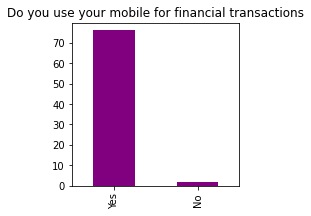

In [51]:
df.MobileBanking.value_counts().plot(kind='bar', figsize=(3,3), title='Do you use your mobile for financial transactions', color='#800080')

In [52]:
df.BankAccount.value_counts().sort_values()

Yes    78
Name: BankAccount, dtype: int64

In [53]:
df.AccountType.value_counts().sort_values() 

Current     1
Both       15
Savings    62
Name: AccountType, dtype: int64

<AxesSubplot:title={'center':'Account Type'}>

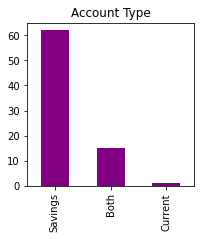

In [54]:
df.AccountType.value_counts().plot(kind='bar', figsize=(3,3), title='Account Type', color='#800080')

In [55]:
df.ServiceProvider.value_counts().sort_values()

Don’t know / Not sure                             2
Another company (Abeg, Kuda, PalmPay, e.t.c.)     2
USSD Code                                        13
Bank App                                         18
Bank App and USSD Code                           43
Name: ServiceProvider, dtype: int64

<AxesSubplot:title={'center':'Service Provider'}>

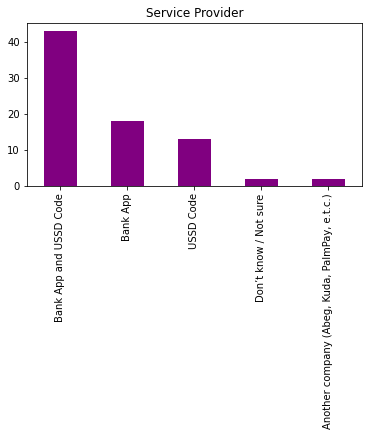

In [56]:
df.ServiceProvider.value_counts().plot(kind='bar', figsize=(6,3), title='Service Provider', color='#800080')

In [57]:
df.PlusBankaccount.value_counts().sort_values()

Separate        9
An addition    69
Name: PlusBankaccount, dtype: int64

<AxesSubplot:title={'center':'Is your mobile banking service an addition to existing bank account or separate service?'}>

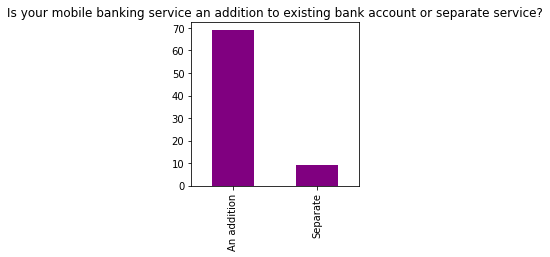

In [58]:
df.PlusBankaccount.value_counts().plot(kind='bar', figsize=(3,3), 
                                       title='Is your mobile banking service an addition to existing bank account or separate service?',
                                       color='#800080')

In [59]:
lst = df.TransactionActivity.str.split(';', expand=True)
transactions = lst.stack()
transactions.value_counts().sort_values()

Buying internet data                 1
Pension fund management              2
International Remittance             8
Commodity dealing / investment      13
Savings                             34
Purchasing                          35
Cash withdrawal                     43
Balance inquiry / Bank statement    46
Receive Money                       64
Buying Airtime                      65
Send Money                          76
dtype: int64

<AxesSubplot:title={'center':'Transaction Type'}>

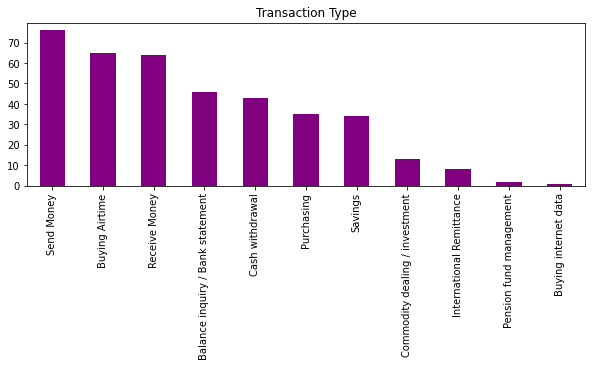

In [60]:
transactions.value_counts().plot(kind='bar', figsize=(10,3), title='Transaction Type', color='#800080')

In [61]:
df.Airtime.value_counts().sort_values()

Occasionally (less than once a month)     4
Monthly-several times                     6
Weekly-several times                      7
Daily-once                               13
Weekly-Once                              20
Daily –Several times                     28
Name: Airtime, dtype: int64

<AxesSubplot:title={'center':'Airtime Purchase'}>

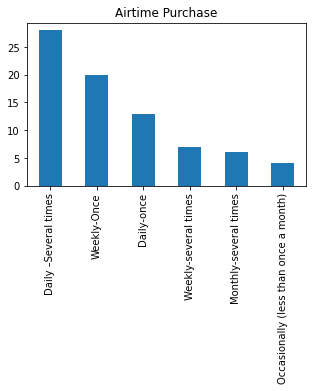

In [62]:
df.Airtime.value_counts().plot(kind='bar', figsize=(5,3), title='Airtime Purchase')

In [63]:
df.FundTransfer.value_counts().sort_values()

Monthly-once                              1
Monthly-several times                     2
Occasionally (less than once a month)     4
Daily-once                               14
Weekly-Once                              17
Daily –Several times                     18
Weekly-several times                     22
Name: FundTransfer, dtype: int64

<AxesSubplot:title={'center':'Fund Transfer'}>

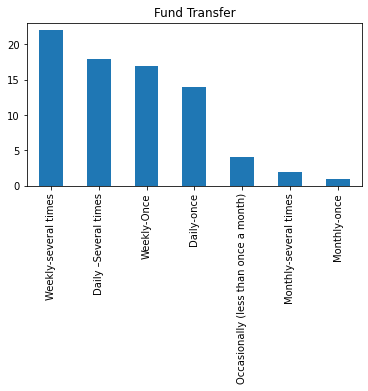

In [64]:
df.FundTransfer.value_counts().plot(kind='bar', figsize=(6,3), title='Fund Transfer')

In [65]:
df.Inquiries.value_counts().sort_values()

Monthly-once                              1
Monthly-several times                     2
Weekly-several times                      4
Daily –Several times                     12
Occasionally (less than once a month)    14
Daily-once                               18
Weekly-Once                              27
Name: Inquiries, dtype: int64

<AxesSubplot:title={'center':'Balance inquiry / Bank statement'}>

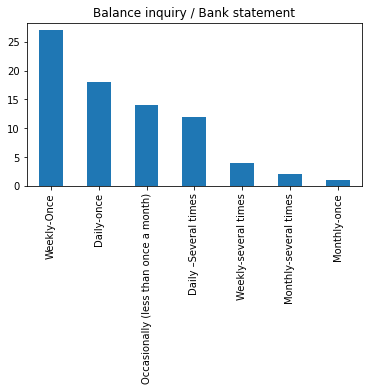

In [66]:
df.Inquiries.value_counts().plot(kind='bar', figsize=(6,3), title='Balance inquiry / Bank statement')

In [67]:
df.BillPayment.value_counts().sort_values()

Monthly-once                              3
Daily-once                                7
Monthly-several times                     7
Daily –Several times                      9
Weekly-several times                     12
Occasionally (less than once a month)    12
Weekly-Once                              28
Name: BillPayment, dtype: int64

<AxesSubplot:title={'center':'Bill Payment'}>

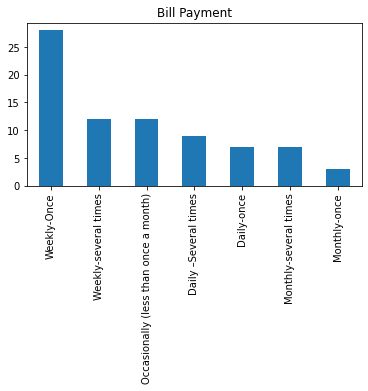

In [68]:
df.BillPayment.value_counts().plot(kind='bar', figsize=(6,3), title='Bill Payment')

In [69]:
df.IntlRemittance.value_counts().sort_values()

Weekly-several times                      1
Monthly-once                              1
Monthly-several times                     3
Daily –Several times                     16
Weekly-Once                              26
Occasionally (less than once a month)    31
Name: IntlRemittance, dtype: int64

<AxesSubplot:title={'center':'International Remittance'}>

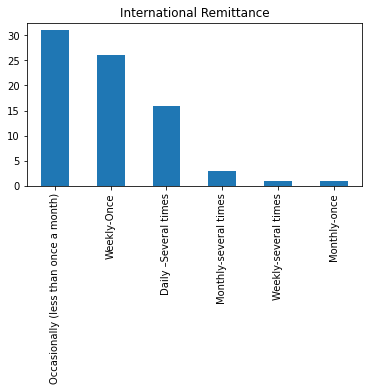

In [70]:
df.IntlRemittance.value_counts().plot(kind='bar', figsize=(6,3), title='International Remittance')

In [71]:
df.Savings.value_counts().sort_values()

Monthly-several times                     3
Weekly-Once                               7
Occasionally (less than once a month)     8
Daily-once                                9
Monthly-once                              9
Weekly-several times                     16
Daily –Several times                     26
Name: Savings, dtype: int64

<AxesSubplot:title={'center':'Savings'}>

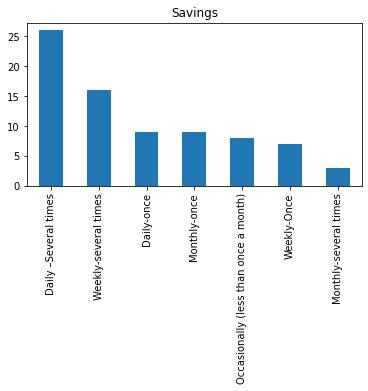

In [72]:
df.Savings.value_counts().plot(kind='bar', figsize=(6,3), title='Savings')

In [73]:
df.Withdrawals.value_counts().sort_values()

Monthly-several times                     3
Occasionally (less than once a month)     4
Monthly-once                              5
Daily-once                               12
Daily –Several times                     16
Weekly-several times                     18
Weekly-Once                              20
Name: Withdrawals, dtype: int64

<AxesSubplot:title={'center':'Cash Withdrawals'}>

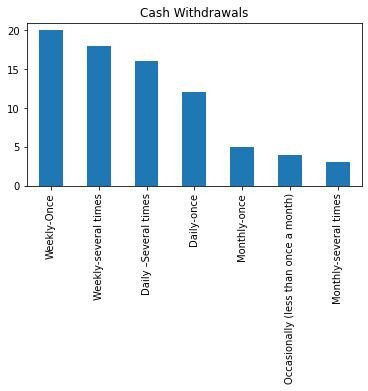

In [74]:
df.Withdrawals.value_counts().plot(kind='bar', figsize=(6,3), title='Cash Withdrawals')

In [75]:
df.Purchasing.value_counts().sort_values()

Monthly-several times                     3
Monthly-once                              3
Daily-once                                7
Weekly-several times                     10
Occasionally (less than once a month)    11
Weekly-Once                              19
Daily –Several times                     25
Name: Purchasing, dtype: int64

<AxesSubplot:title={'center':'Purchasing'}>

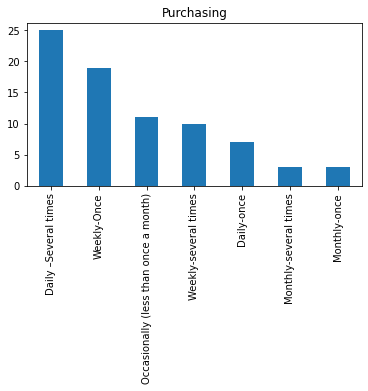

In [76]:
df.Purchasing.value_counts().plot(kind='bar', figsize=(6,3), title='Purchasing')

In [77]:
df.Investments.value_counts().sort_values()

Weekly-several times                      4
Daily-once                                4
Occasionally (less than once a month)    19
Daily –Several times                     24
Weekly-Once                              27
Name: Investments, dtype: int64

<AxesSubplot:title={'center':'Commodity Dealing / Investments'}>

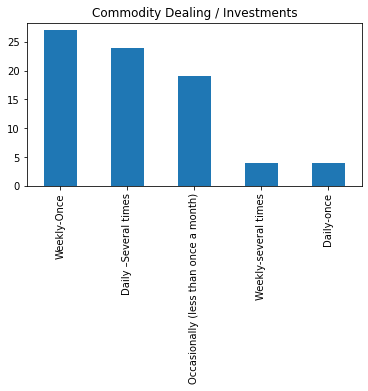

In [78]:
df.Investments.value_counts().plot(kind='bar', figsize=(6,3), title='Commodity Dealing / Investments')

In [79]:
df.PensionFund.value_counts().sort_values()

Weekly-several times                      4
Weekly-Once                              18
Daily –Several times                     19
Occasionally (less than once a month)    37
Name: PensionFund, dtype: int64

<AxesSubplot:title={'center':'Pension Fund Management'}>

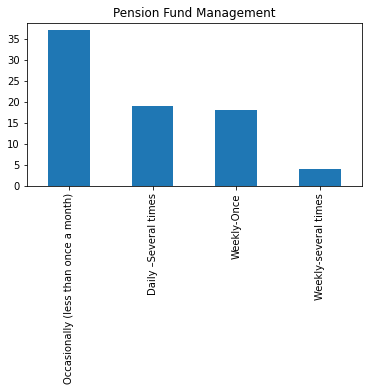

In [80]:
df.PensionFund.value_counts().plot(kind='bar', figsize=(6,3), title='Pension Fund Management')

In [81]:
TF = df.TransferFunnel.str.split(';', expand=True)
TF = TF.stack()
TF.value_counts().sort_values()

Western Union, Money Gram          1
Bank teller                        6
Automatic Teller Machine (ATM)    16
Point Of Sale (POS) Service       21
Mobile money                      43
Online/Internet                   57
dtype: int64

<AxesSubplot:title={'center':'How do you transfer money'}>

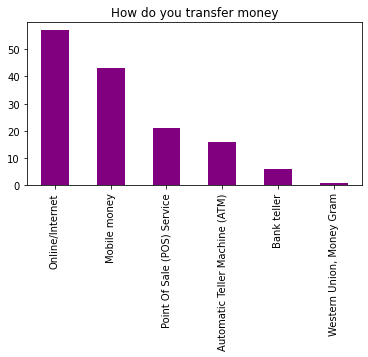

In [82]:
TF.value_counts().plot(kind='bar', figsize=(6,3), title='How do you transfer money', color='#800080')

In [83]:
df.SendRecieve.value_counts().sort_values()

Send                 2
Send and Receive    76
Name: SendRecieve, dtype: int64

<AxesSubplot:title={'center':'Do you normally send funds, recieve or do both'}>

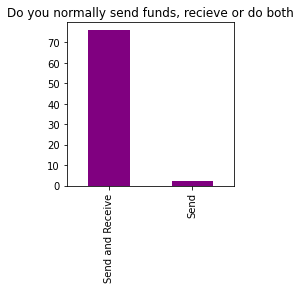

In [84]:
df.SendRecieve.value_counts().plot(kind='bar', figsize=(3,3), title='Do you normally send funds, recieve or do both', color='#800080')

In [85]:
df.Transfer_Family.value_counts().sort_values()

Send       18
Receive    19
Both       41
Name: Transfer_Family, dtype: int64

<AxesSubplot:title={'center':'Transfer to Family'}>

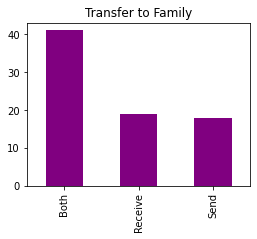

In [86]:
df.Transfer_Family.value_counts().plot(kind='bar', figsize=(4,3), title='Transfer to Family', color='#800080')

In [87]:
df.Transfer_Friends.value_counts().sort_values()

Receive    13
Send       18
Both       47
Name: Transfer_Friends, dtype: int64

<AxesSubplot:title={'center':'Transfer to Friends'}>

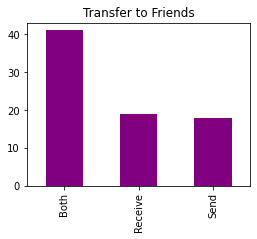

In [88]:
df.Transfer_Family.value_counts().plot(kind='bar', figsize=(4,3), title='Transfer to Friends', color='#800080')

In [89]:
df.Employer_Employee.value_counts().sort_values()

Send        6
Both       25
Receive    47
Name: Employer_Employee, dtype: int64

<AxesSubplot:title={'center':'Employer / Employee'}>

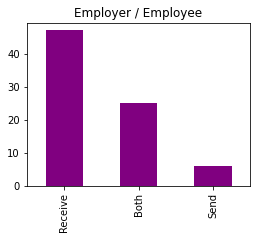

In [90]:
df.Employer_Employee.value_counts().plot(kind='bar', figsize=(4,3), title='Employer / Employee', color='#800080')

In [91]:
df.Transfer_Government.value_counts().sort_values()

Both       15
Receive    22
Send       41
Name: Transfer_Government, dtype: int64

<AxesSubplot:title={'center':'Transfer to Government (Remita, Tax, e.t.c.)'}>

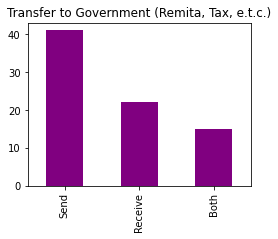

In [92]:
df.Transfer_Government.value_counts().plot(kind='bar', figsize=(4,3), title='Transfer to Government (Remita, Tax, e.t.c.)', color='#800080')

In [93]:
BP = df.BillPayments.str.split(';', expand=True)
BP = BP.stack()
BP.value_counts().sort_values()

Prepaid card                       5
Cheque                             6
Bank teller                       11
Pay outlet by company             17
Third party pay outlet            17
Automatic Teller Machine (ATM)    22
Credit card                       23
Cash direct to company            25
Mobile banking                    65
dtype: int64

<AxesSubplot:title={'center':'How do you pay your bills'}>

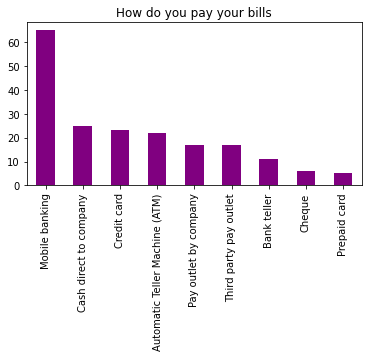

In [94]:
BP.value_counts().plot(kind='bar', figsize=(6,3), title='How do you pay your bills', color='#800080')

In [95]:
BPT = df.BillpaymentType.str.split(';', expand=True)
BPT = BPT.stack()
BPT.value_counts().sort_values()

Gasing fee                       1
None                             6
Goods for work                  29
Utility (electricity, water)    34
School fees                     37
Goods for home                  42
Mobile phone bill               53
dtype: int64

<AxesSubplot:title={'center':'What types bills do you Pay'}>

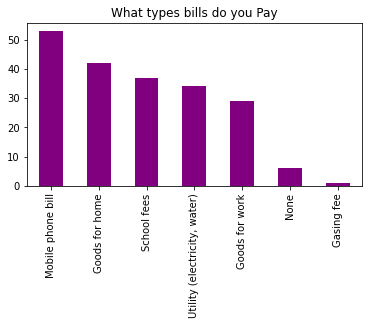

In [96]:
BPT.value_counts().plot(kind='bar', figsize=(6,3), title='What types bills do you Pay', color='#800080')

In [97]:
df.Accessibility.value_counts().sort_values()

No      1
Yes    77
Name: Accessibility, dtype: int64

<AxesSubplot:title={'center':'Do you think Mobile banking services are easily accessible than traditional banking services?'}>

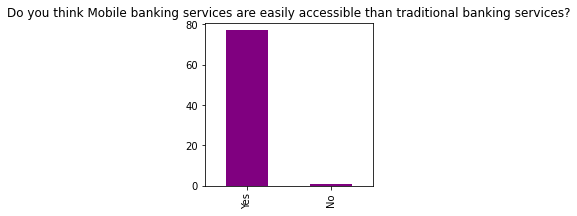

In [98]:
df.Accessibility.value_counts().plot(kind='bar', figsize=(3,3), 
                                     title='Do you think Mobile banking services are easily accessible than traditional banking services?', 
                                     color='#800080')

In [99]:
df.BankKnowledge.value_counts().sort_values()

1.0    15
3.0    23
2.0    40
Name: BankKnowledge, dtype: int64

<AxesSubplot:title={'center':'Bank Services Knowledge'}>

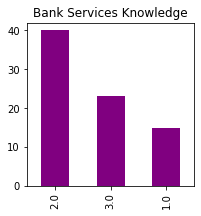

In [100]:
df.BankKnowledge.value_counts().plot(kind='bar', figsize=(3,3), title='Bank Services Knowledge', color='#800080')

In [101]:
df.MBSKnowledge.value_counts().sort_values()

1.0     6
2.0    23
3.0    49
Name: MBSKnowledge, dtype: int64

<AxesSubplot:title={'center':'Mobile Banking Service Knowledge'}>

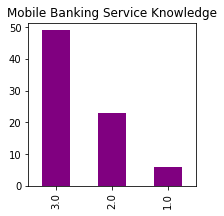

In [102]:
df.MBSKnowledge.value_counts().plot(kind='bar', figsize=(3,3), title='Mobile Banking Service Knowledge', color='#800080')

In [103]:
df.MobileUsability.value_counts().sort_values()

1.0     4
2.0    12
3.0    62
Name: MobileUsability, dtype: int64

<AxesSubplot:title={'center':'Ability to use mobile phone'}>

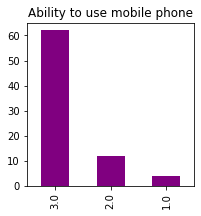

In [104]:
df.MobileUsability.value_counts().plot(kind='bar', figsize=(3,3), title='Ability to use mobile phone', color='#800080')

In [105]:
df.ATMUsability.value_counts().sort_values()

1.0     8
2.0    14
3.0    56
Name: ATMUsability, dtype: int64

<AxesSubplot:title={'center':'Ability to use ATM'}>

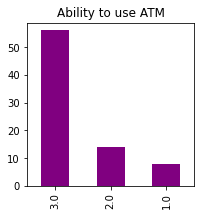

In [106]:
df.ATMUsability.value_counts().plot(kind='bar', figsize=(3,3), title='Ability to use ATM', color='#800080')

In [107]:
df.InternetUsability.value_counts().sort_values()

1.0     5
2.0    17
3.0    56
Name: InternetUsability, dtype: int64

<AxesSubplot:title={'center':'Ability to use Internet'}>

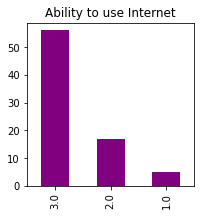

In [108]:
df.InternetUsability.value_counts().plot(kind='bar', figsize=(3,3), title='Ability to use Internet', color='#800080')

In [109]:
df.POSUsability.value_counts().sort_values()

1.0    16
2.0    28
3.0    34
Name: POSUsability, dtype: int64

<AxesSubplot:title={'center':'Ability to use POS'}>

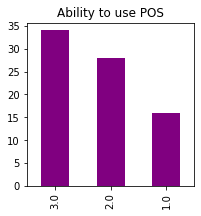

In [110]:
df.POSUsability.value_counts().plot(kind='bar', figsize=(3,3), title='Ability to use POS', color='#800080')

In [111]:
df.DebitcardUsability.value_counts().sort_values()

1.0     4
2.0    20
3.0    54
Name: DebitcardUsability, dtype: int64

<AxesSubplot:title={'center':'Ability to use Debitcard'}>

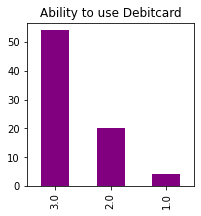

In [112]:
df.DebitcardUsability.value_counts().plot(kind='bar', figsize=(3,3), title='Ability to use Debitcard', color='#800080')

In [113]:
df.PrepaidcardUsability.value_counts().sort_values()

1.0    20
3.0    26
2.0    32
Name: PrepaidcardUsability, dtype: int64

<AxesSubplot:title={'center':'Ability to use Prepaid card'}>

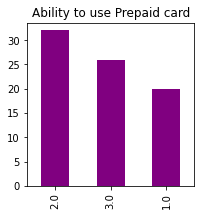

In [114]:
df.PrepaidcardUsability.value_counts().plot(kind='bar', figsize=(3,3), title='Ability to use Prepaid card', color='#800080')

In [115]:
df.Navigation.value_counts().sort_values()

1.0     5
2.0    14
3.0    59
Name: Navigation, dtype: int64

<AxesSubplot:title={'center':'My mobile banking menu is very easy to navigate'}>

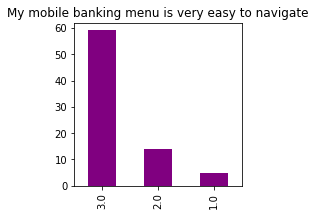

In [116]:
df.Navigation.value_counts().plot(kind='bar', figsize=(3,3), 
                                  title='My mobile banking menu is very easy to navigate', 
                                  color='#800080')

In [117]:
df.Understandable.value_counts().sort_values()

1.0     1
2.0    18
3.0    59
Name: Understandable, dtype: int64

<AxesSubplot:title={'center':'My mobile banking menu is very easy to understand'}>

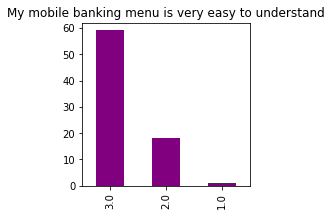

In [118]:
df.Understandable.value_counts().plot(kind='bar', figsize=(3,3), 
                                      title='My mobile banking menu is very easy to understand', 
                                      color='#800080')

In [119]:
df.Payment.value_counts().sort_values()

1.0     1
2.0    10
3.0    67
Name: Payment, dtype: int64

<AxesSubplot:title={'center':'It is easy to make a payment'}>

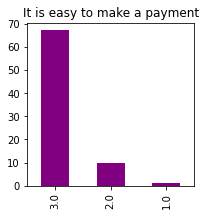

In [120]:
df.Payment.value_counts().plot(kind='bar', figsize=(3,3), 
                               title='It is easy to make a payment', 
                               color='#800080')

In [121]:
df.Transfer_Ease.value_counts().sort_values()

1.0     3
2.0    11
3.0    64
Name: Transfer_Ease, dtype: int64

<AxesSubplot:title={'center':'It is easy to transfer money'}>

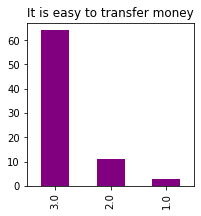

In [122]:
df.Transfer_Ease.value_counts().plot(kind='bar', figsize=(3,3), title='It is easy to transfer money', color='#800080')

In [123]:
df.InquiryEase.value_counts().sort_values()

1.0     4
2.0    10
3.0    64
Name: InquiryEase, dtype: int64

<AxesSubplot:title={'center':'It is easy to make inquiries'}>

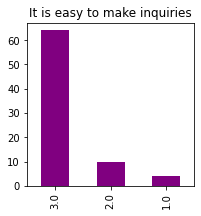

In [124]:
df.InquiryEase.value_counts().plot(kind='bar', figsize=(3,3), title='It is easy to make inquiries', color='#800080')

In [125]:
df.BST_Overall.value_counts().sort_values()

1.0     5
3.0    29
2.0    44
Name: BST_Overall, dtype: int64

<AxesSubplot:title={'center':'Trust Bank Service Fully'}>

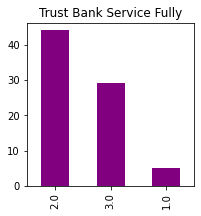

In [126]:
df['BST_Overall'].value_counts().plot(kind='bar', figsize=(3,3), title='Trust Bank Service Fully', color='#800080')

In [127]:
df['BST_banks'].value_counts().sort_values()

1.0     8
3.0    29
2.0    41
Name: BST_banks, dtype: int64

<AxesSubplot:title={'center':'Trust Bank Service Fully'}>

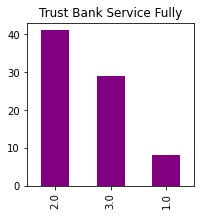

In [128]:
df['BST_banks'].value_counts().plot(kind='bar', figsize=(3,3), title='Trust Bank Service Fully', color='#800080')

In [129]:
df.BST_technology.value_counts().sort_values()

1.0     4
3.0    34
2.0    40
Name: BST_technology, dtype: int64

<AxesSubplot:title={'center':'Trust in the technology of mobile banking'}>

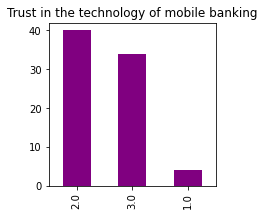

In [130]:
df.BST_technology.value_counts().plot(kind='bar', figsize=(3,3), 
                                      title='Trust in the technology of mobile banking', 
                                      color='#800080')

In [131]:
df.BST_thirdparty.value_counts().sort_values()

3.0    11
1.0    23
2.0    44
Name: BST_thirdparty, dtype: int64

<AxesSubplot:title={'center':'Trust in third party agent (e.g., pay outlet, cash-out point'}>

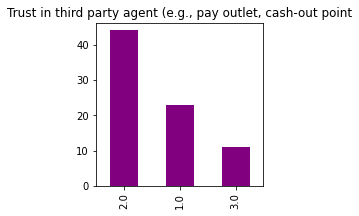

In [132]:
df.BST_thirdparty.value_counts().plot(kind='bar', figsize=(3,3), 
                                      title='Trust in third party agent (e.g., pay outlet, cash-out point', 
                                      color='#800080')

In [133]:
df.Security.value_counts().sort_values()

1.0    10
3.0    16
2.0    52
Name: Security, dtype: int64

<AxesSubplot:title={'center':'Security from fraud'}>

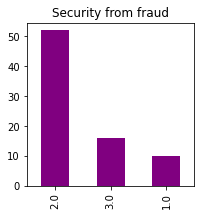

In [134]:
df.Security.value_counts().plot(kind='bar', figsize=(3,3), title='Security from fraud', color='#800080')

In [135]:
df.Usage.value_counts().sort_values()

1.0     3
2.0    18
3.0    57
Name: Usage, dtype: int64

<AxesSubplot:title={'center':'Ease of use'}>

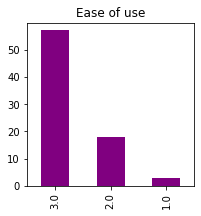

In [136]:
df.Usage.value_counts().plot(kind='bar', figsize=(3,3), title='Ease of use', color='#800080')

In [137]:
df.Cost.value_counts().sort_values()

1.0    13
3.0    25
2.0    40
Name: Cost, dtype: int64

<AxesSubplot:title={'center':'Cost saving'}>

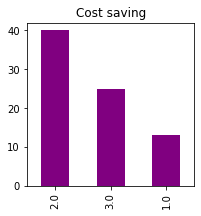

In [138]:
df.Cost.value_counts().plot(kind='bar', figsize=(3,3), title='Cost saving', color='#800080')

In [139]:
df.Time.value_counts().sort_values()

1.0     4
2.0    11
3.0    63
Name: Time, dtype: int64

<AxesSubplot:title={'center':'Time saving (no need to go to bank or ATM)'}>

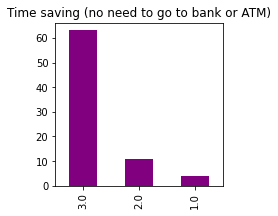

In [140]:
df.Time.value_counts().plot(kind='bar', figsize=(3,3), 
                                     title='Time saving (no need to go to bank or ATM)', 
                                     color='#800080')

In [141]:
df.Access.value_counts().sort_values()

1.0     4
2.0    11
3.0    63
Name: Access, dtype: int64

<AxesSubplot:title={'center':'24 h Access (can make transaction any time)'}>

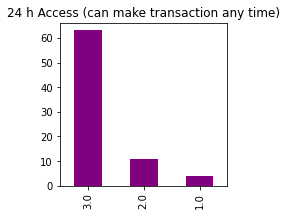

In [142]:
df.Access.value_counts().plot(kind='bar', figsize=(3,3), 
                              title='24 h Access (can make transaction any time)', 
                              color='#800080')

In [143]:
df.Physical_security.value_counts().sort_values()

1.0     5
2.0    13
3.0    60
Name: Physical_security, dtype: int64

<AxesSubplot:title={'center':'Physical security (no need to go out with cash)'}>

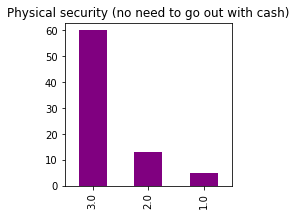

In [144]:
df.Physical_security.value_counts().plot(kind='bar', figsize=(3,3), 
                                         title='Physical security (no need to go out with cash)', 
                                         color='#800080')

In [145]:
df.Specifics.value_counts().sort_values()

1.0     5
3.0     7
2.0    66
Name: Specifics, dtype: int64

<AxesSubplot:title={'center':'Other Benefits Mobile Banking'}>

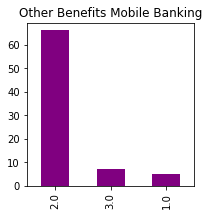

In [146]:
df.Specifics.value_counts().plot(kind='bar', figsize=(3,3), title='Other Benefits Mobile Banking', color='#800080')

In [147]:
df.LTC_Importance.value_counts().sort_values()

3.0    20
1.0    27
2.0    31
Name: LTC_Importance, dtype: int64

<AxesSubplot:title={'center':'Lower transaction costs'}>

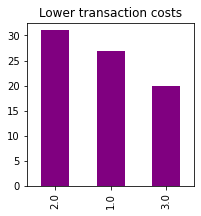

In [148]:
df.LTC_Importance.value_counts().plot(kind='bar', figsize=(3,3), title='Lower transaction costs', color='#800080')

In [149]:
df.SFF_Importance.value_counts().sort_values()

3.0    17
1.0    26
2.0    35
Name: SFF_Importance, dtype: int64

<AxesSubplot:title={'center':'security from fraud'}>

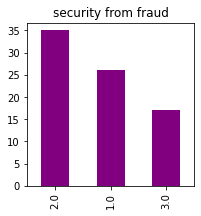

In [150]:
df.SFF_Importance.value_counts().plot(kind='bar', figsize=(3,3), title='security from fraud', color='#800080')

In [151]:
df.PS_Importance.value_counts().sort_values()

3.0    22
1.0    27
2.0    29
Name: PS_Importance, dtype: int64

<AxesSubplot:title={'center':'Physical Security'}>

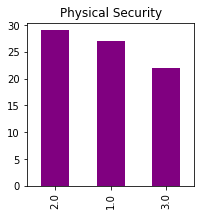

In [152]:
df.PS_Importance.value_counts().plot(kind='bar', figsize=(3,3), title='Physical Security', color='#800080')

In [153]:
df.Feedback_Importance.value_counts().sort_values()

2.0    19
3.0    29
1.0    30
Name: Feedback_Importance, dtype: int64

<AxesSubplot:title={'center':'Safe transaction with feedback on transfer (e.g. sms)'}>

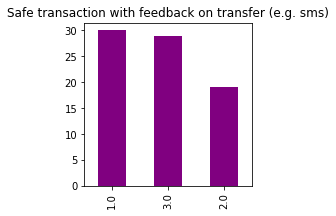

In [154]:
df.Feedback_Importance.value_counts().plot(kind='bar', figsize=(3,3), 
                                           title='Safe transaction with feedback on transfer (e.g. sms)', 
                                           color='#800080')

In [155]:
df.Range_Importance.value_counts().sort_values()

3.0    24
2.0    25
1.0    29
Name: Range_Importance, dtype: int64

<AxesSubplot:title={'center':'Wide acceptance of mobile money'}>

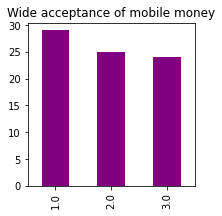

In [156]:
df.Range_Importance.value_counts().plot(kind='bar', figsize=(3,3), 
                                        title='Wide acceptance of mobile money', 
                                        color='#800080')

In [157]:
df.TA__Importance.value_counts().sort_values()

3.0    23
1.0    23
2.0    32
Name: TA__Importance, dtype: int64

<AxesSubplot:title={'center':'More locations I can cash-out my money'}>

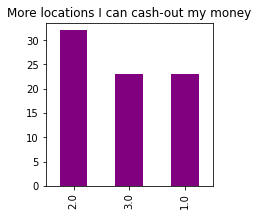

In [158]:
df.TA__Importance.value_counts().plot(kind='bar', figsize=(3,3), 
                                      title='More locations I can cash-out my money', 
                                      color='#800080')

In [159]:
df.Specific_Importance.value_counts().sort_values()

3.0     6
1.0     9
2.0    63
Name: Specific_Importance, dtype: int64

<AxesSubplot:title={'center':'Other Specific Importance of Mobile Banking'}>

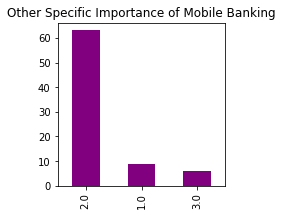

In [160]:
df.Specific_Importance.value_counts().plot(kind='bar', figsize=(3,3), 
                                           title='Other Specific Importance of Mobile Banking', 
                                           color='#800080')